# Shang Danqin Logistic analysis

## This is a telelcom dataset that we will predict whether the customer is going to churn (leave the telecom company) or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
d = pd.read_csv('C:\\Users\shang\Desktop\Python\midterm\WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = d #Back up dataset

### Check the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes
tenure,1,34,2,45,2,8,22,10,28,62
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges is numeric in the dataset but its data type is object, so I will convert it to float.
SeniorCitizen is composed of 0 and 1, I will not treat it as int.

In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['SeniorCitizen'] = data.SeniorCitizen.astype(str)

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Missing value

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From below I can see that its range is pretty large, not 
very appropriate to manipulate the missing value with mean or median.
Since there are 7043 data and only 11 is missing, I will just drop it.

In [9]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [5]:
data = data.dropna()
data = data.drop(['customerID'], axis=1)

### Visualize dataset

There are 3 **numerical variables**: tenure, MonthlyCharges, TotalCharges.Let's explore them first.

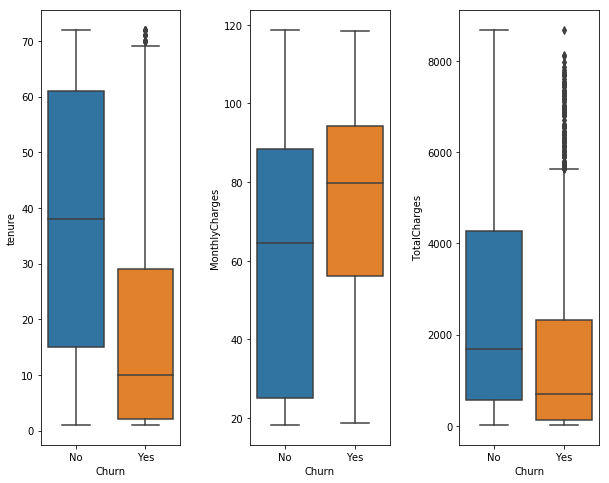

In [11]:
num_var = data[['tenure','MonthlyCharges','TotalCharges']]
fig,ax = plt.subplots(1,3,figsize=(10,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0,3):
    sns.boxplot(y=num_var.iloc[:,i], x=data['Churn'], ax=ax[i])


From plot above, we can see that people have higher tenure tend to not leave the company. For Monthly Charge and Total Charge I
want to explore more

**Monthly Charges with Churn**.
From the plot below, if the monthly charge is low, most customers leave which is a little weird, it may be those customers are not interested in this company.
If the monthly charge is median and high, almost half of customers leave.

In [12]:
data['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

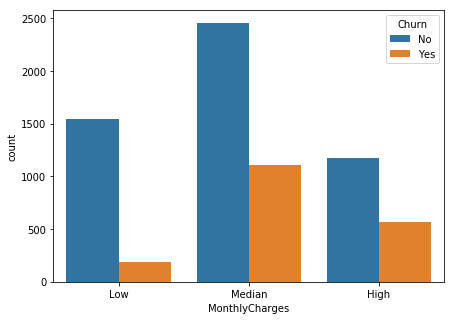

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
month_bins = pd.cut(data['MonthlyCharges'], bins=[0,35,90,120], labels=['Low','Median','High'])
sns.countplot(x=month_bins, hue='Churn', data=data)


**Total Charges with Churn**
Compare to Monthly Charges, most customers stay if the total charge is low.
When the total charge increases, more customers choose to leave proportionally.

In [14]:
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

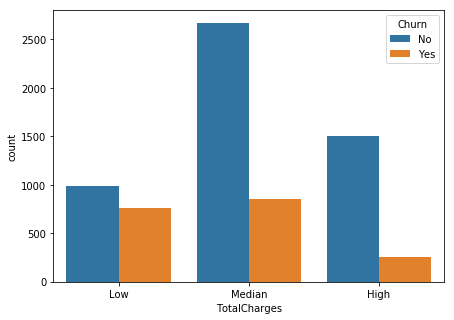

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
total_bins = pd.cut(data['TotalCharges'], bins=[0,400,3800,8800], labels=['Low','Median','High'])
sns.countplot(x=total_bins, hue='Churn', data=data)

There are 16 **Categorical variables**

In [16]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
cat_var = data.iloc[:,np.r_[0:4, 5:17]]  #choose categorical variables

In [18]:
cat_var.shape

(7032, 16)

In [19]:
list(cat_var)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

IndexError: too many indices for array

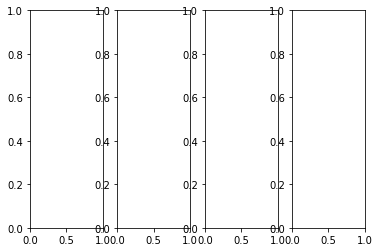

In [14]:
fig,ax =plt.subplots(1,4)
for i in range(0,2):
    plt.plot(x=cat_var.iloc[:,i], hue=data['Churn'],ax=ax[0,i])

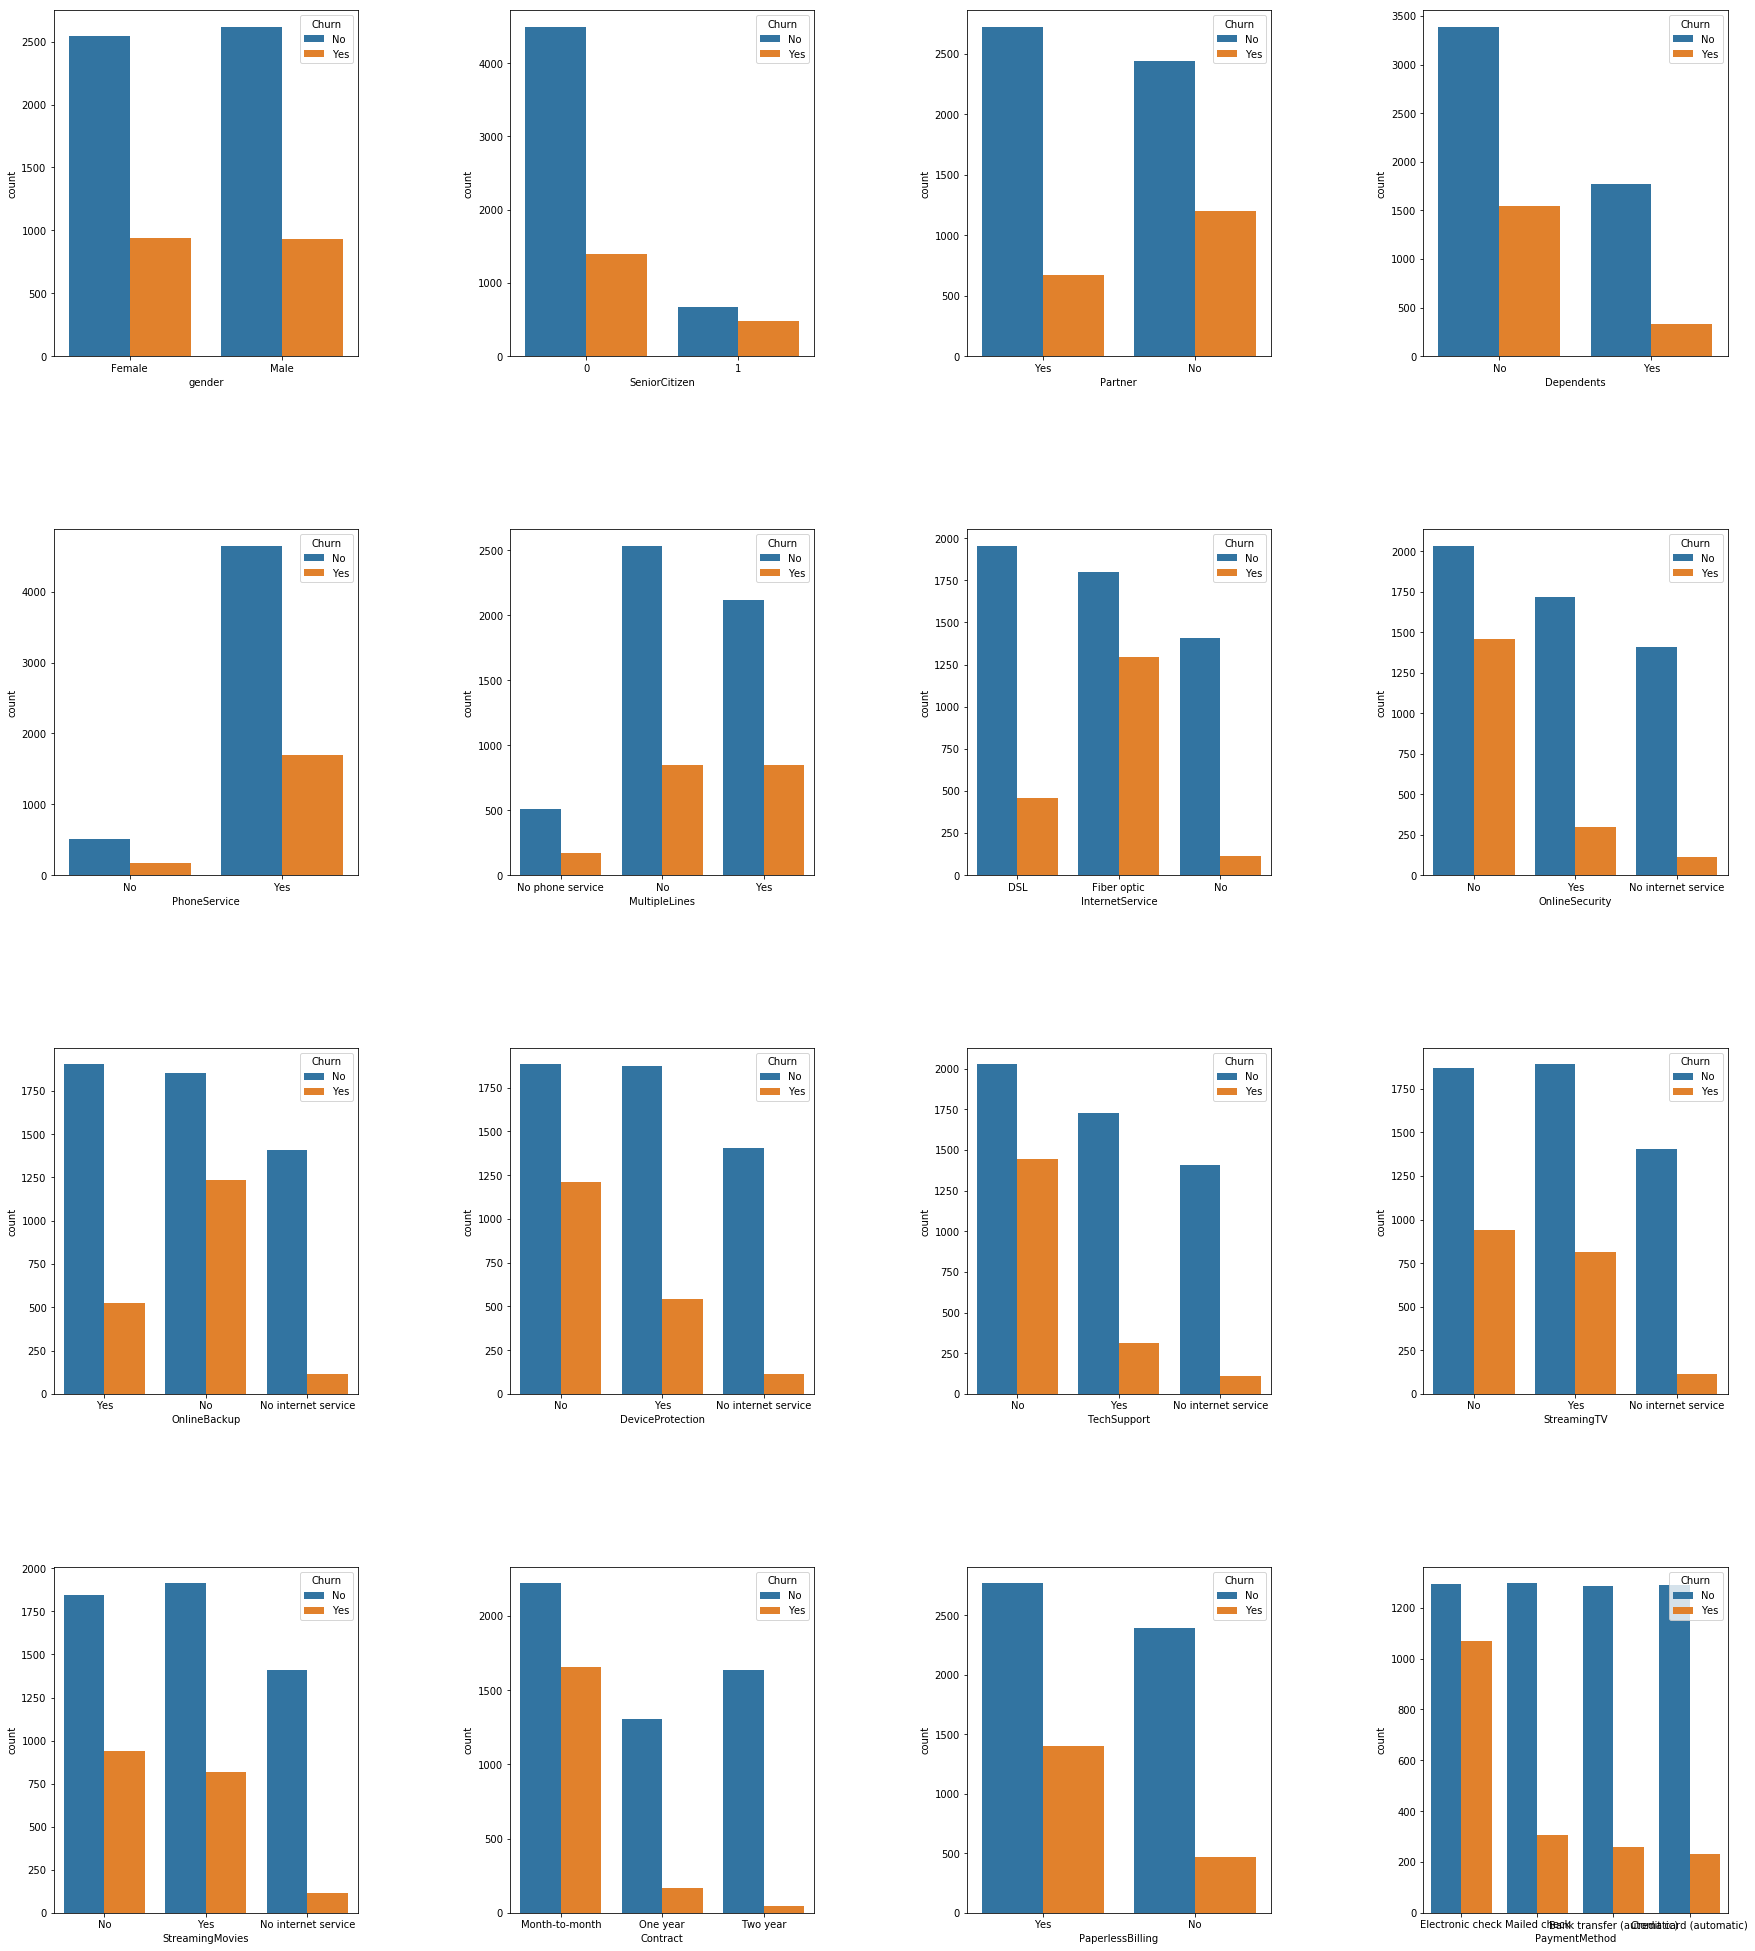

In [20]:
fig, ax = plt.subplots(4, 4, figsize=(30, 35))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
sns.countplot(cat_var['gender'] , hue=data['Churn'],ax=ax[0,0])
sns.countplot(cat_var['SeniorCitizen'] , hue=data['Churn'],ax=ax[0,1])
sns.countplot(cat_var['Partner'] , hue=data['Churn'],ax=ax[0,2])
sns.countplot(cat_var['Dependents'] , hue=data['Churn'],ax=ax[0,3])
sns.countplot(cat_var['PhoneService'] , hue=data['Churn'],ax=ax[1,0])
sns.countplot(cat_var['MultipleLines'] , hue=data['Churn'],ax=ax[1,1])
sns.countplot(cat_var['InternetService'] , hue=data['Churn'],ax=ax[1,2])
sns.countplot(cat_var['OnlineSecurity'] , hue=data['Churn'],ax=ax[1,3])
sns.countplot(cat_var['OnlineBackup'] , hue=data['Churn'],ax=ax[2,0])
sns.countplot(cat_var['DeviceProtection'] , hue=data['Churn'],ax=ax[2,1])
sns.countplot(cat_var['TechSupport'] , hue=data['Churn'],ax=ax[2,2])
sns.countplot(cat_var['StreamingTV'] , hue=data['Churn'],ax=ax[2,3])
sns.countplot(cat_var['StreamingMovies'] , hue=data['Churn'],ax=ax[3,0])
sns.countplot(cat_var['Contract'] , hue=data['Churn'],ax=ax[3,1])
sns.countplot(cat_var['PaperlessBilling'] , hue=data['Churn'],ax=ax[3,2])
sns.countplot(cat_var['PaymentMethod'] , hue=data['Churn'],ax=ax[3,3])

### Converting categorical features to dummy variables

In [21]:
dummy = pd.get_dummies(cat_var, drop_first=True)  
data = pd.concat([data['Churn'],data['tenure'], data['MonthlyCharges'],data['TotalCharges'],dummy], axis=1)
data.head().T

,0,1,2,3,4
Churn,No,No,Yes,No,Yes
tenure,1,34,2,45,2
MonthlyCharges,29.85,56.95,53.85,42.3,70.7
TotalCharges,29.85,1889.5,108.15,1840.75,151.65
gender_Male,0,1,1,1,0
SeniorCitizen_1,0,0,0,0,0
Partner_Yes,1,0,0,0,0
Dependents_Yes,0,0,0,0,0
PhoneService_Yes,0,1,1,0,1
MultipleLines_No phone service,1,0,0,1,0


### Building a Logistic Regression model

#### K-Fold CV

Use CV to varify the over performance of logistic model, and it turns out good.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

In [23]:
logmodel = LogisticRegression()
x = data.drop('Churn',axis=1)
y= data['Churn']
kfold = model_selection.StratifiedKFold(n_splits=10, random_state = 123)
cv = model_selection.cross_val_score(logmodel, x, y, cv = kfold, scoring = 'accuracy')
print('\033[1m'+'Logistic Regression Score:', '\033[0m',cv.mean(), '\033[1m'+'Standard Deviation:', '\033[0m',cv.std())

Logistic Regression Score:  0.80304470543 Standard Deviation:  0.0101116550506


#### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.25, 
                                                    random_state=123)


#### Training & Predicting

In [26]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
prediction = logmodel.predict(x_test)

#### Evaluation

In [28]:
from sklearn.metrics import confusion_matrix
print('\033[1m'+ 'Confusion Matrix')
print('\033[0m',confusion_matrix(y_test, prediction))

Confusion Matrix
 [[1133  101]
 [ 245  279]]


In [29]:
from sklearn.metrics import classification_report
print('\033[1m'+'Classification Report')
print('\033[0m',classification_report(y_test, prediction))

Classification Report
              precision    recall  f1-score   support

         No       0.82      0.92      0.87      1234
        Yes       0.73      0.53      0.62       524

avg / total       0.80      0.80      0.79      1758



### Conclusion

From classification report above, the result for 'No' is better than 'Yes, maybe because there are 2 times 'No'
than 'Yes' in the dataset, and some estimators are sensitive to not-balanced dataset. Overall the prediction is good which has 80% accuracy.